In [89]:
import numpy as np
from scipy.spatial import cKDTree
import pyvista as pv
import matplotlib.pyplot as plt
import mayavi
import pandas as pd

In [8]:
# Load meshes (replace with your file paths)
mesh1 = pv.read("C:\\Users\\diton\\Desktop\\skull_cut.stl")
mesh2 = pv.read("C:\\Users\\diton\\Desktop\\skin_cut.stl")

# Create k-d tree for mesh1
tree = cKDTree(mesh1.points)

# List to store distances
distances = []

# Iterate through vertices of mesh2 and find closest points
for point in mesh2.points:
    _, idx = tree.query(point)
    closest_point = mesh1.points[idx]
    distance = np.linalg.norm(point - closest_point)
    distances.append(distance)

In [9]:
# Print minimum, maximum, and average distances
print(f"Minimum distance: {min(distances)}")
print(f"Maximum distance: {max(distances)}")
print(f"Average distance: {np.mean(distances)}")

Minimum distance: 1.7392804622650146
Maximum distance: 27.277362823486328
Average distance: 8.333407402038574


(array([  833.,  8872., 10609.,  7546.,  6227.,  4781.,  7576.,  8020.,
         6358.,  3871.,  2994.,  2636.,  2431.,  2176.,  1821.,  1585.,
         2559.,  1824.,  1460.,   814.,   558.,   516.,   527.,   362.,
          288.,   278.,   204.,   159.,    70.,    48.]),
 array([ 1.73928046,  2.59054995,  3.44181919,  4.29308891,  5.14435816,
         5.9956274 ,  6.84689713,  7.69816637,  8.54943562,  9.40070534,
        10.25197411, 11.10324383, 11.95451355, 12.80578327, 13.65705204,
        14.50832176, 15.35959148, 16.21086121, 17.06212997, 17.91339874,
        18.76466942, 19.61593819, 20.46720695, 21.31847763, 22.1697464 ,
        23.02101517, 23.87228584, 24.72355461, 25.57482338, 26.42609406,
        27.27736282]),
 <BarContainer object of 30 artists>)

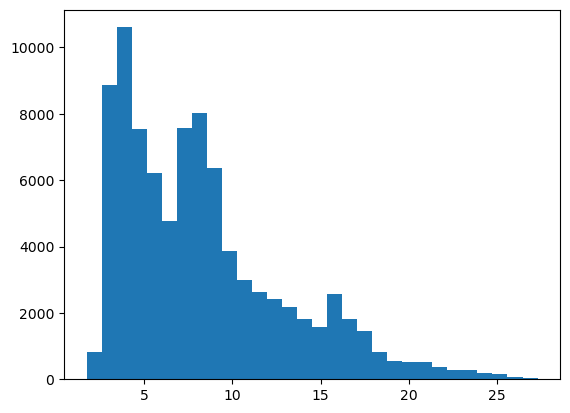

In [13]:
plt.hist(distances, bins=30)

In [30]:
distances_array = np.array(distances)
# points_with_distance = np.reshape(mesh1.points, (-1, 3))
points_with_distance = mesh1.points.copy()

print(points_with_distance.shape)
print(distances_array.shape)

(147722, 3)
(88003,)


In [81]:
# Assuming 'mesh1' has points and 'distances_array' holds calculated distances
filtered_points = []
filtered_distances = []

for i, distance in enumerate(distances_array):
  if not np.isnan(distance):  # Check if distance is not NaN
    filtered_points.append(mesh1.points[i])
    filtered_distances.append(distance)
      
filtered_points_array = np.array(filtered_points)
filtered_distances_array = np.array(filtered_distances)


In [82]:
# # Convert filtered points and distances to NumPy arrays
# filtered_points_array = [point[:3] for point in filtered_points]
# filtered_points_array = np.array(filtered_points)

selected_points = []
for point in filtered_points:
  selected_points.append([float(x) for x in point[:3]])  # Convert first 3 elements to floats
filtered_points_array = np.array(selected_points)

filtered_distances_array = np.array(filtered_distances)

# Checking where is the problem!!! But it's not clear....
print(filtered_points_array.shape)
print(filtered_distances_array.shape)
print(distances_array.shape)
print(distances_array.dtype)
print(filtered_points[:5])

(88003, 3)
(88003,)
(88003,)
float32
[pyvista_ndarray([ 12.181999, -55.791283, -31.22261 ], dtype=float32), pyvista_ndarray([ 12.07309 , -56.06076 , -31.318588], dtype=float32), pyvista_ndarray([ 12.107758, -55.95526 , -30.919739], dtype=float32), pyvista_ndarray([ 12.183731, -55.773193, -30.908478], dtype=float32), pyvista_ndarray([ 12.193764, -55.794403, -30.512009], dtype=float32)]


In [65]:
print(filtered_points_array.shape)
combined_array = np.hstack((filtered_points_array, distances_array[:, None]))
print(combined_array.shape)

(88003, 3)
(88003, 4)


In [107]:
# Assuming filtered_points_array is a pandas DataFrame with columns for x, y, z

# filtered_points_array = np.transpose(filtered_points_array)
points = pv.PolyData(np.transpose(filtered_points_array))
if len(distances_array) == len(points):  # Check for matching lengths
    points.point_arrays["distances"] = distances_array
# Assuming filtered_points_array is a pandas DataFrame with columns for x, y, z
# data = pd.DataFrame({"x": filtered_points_array[:, 0], "y": filtered_points_array[:, 1], "z": filtered_points_array[:, 2], "distances": distances_array})
# points = pv.PolyData(data)  # Create PolyData from DataFrame
plotter = pv.Plotter()
plotter.add_mesh(points, scalars = "distances", cmap = "plasma")  # "plasma" colormap
plotter.show()

TypeError: object of type 'PolyData' has no len()

In [75]:
# Just checking. Not to the project
sample_points = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])  # Sample points
sample_distances = np.array([10, 20, 30])  # Sample distances

sliced_points_2 = sample_points[:, :3]  # Slice to get x, y, z
combined_array = np.hstack((sliced_points_2, sample_distances[:, None]))

print(combined_array.shape)
print(sliced_points_2.shape)

(3, 4)
(3, 3)


In [57]:
try:
  mesh1_colored = pv.PolyData(np.hstack((filtered_points_array, distances_array[:, None])))
except Exception as e:
  print(f"Error creating PolyData: {e}")

Error creating PolyData: Points array must contain three values per point. Shape is (88003, 4) and should be (X, 3)


In [72]:
mesh1_colored = pv.PolyData(np.hstack((filtered_points_array, distances_array[:, None])))

# Create a PolyData with the points and distances
mesh1_colored = pv.PolyData(points_with_distance)

# Color mapper for the distances
mapper = pv.UniformColorMapping(scalar_range = (min(distances), max(distances)))
mapper.auto_scalars = False  # Avoid automatic range scaling

# Apply the color mapper and scalar field to mesh1
mesh1_colored.scalars = distances_array
mesh1_colored.color(mapper) 

# Plot both meshes with different colors
plotter = pv.Plotter()
plotter.add_mesh(mesh1, color = 'white')  # Original mesh in white
plotter.add_mesh(mesh1_colored, cmap = mapper, show_scalar_bar = True, label = "Distance to mesh2")
plotter.show()

ValueError: Points array must contain three values per point. Shape is (88003, 4) and should be (X, 3)